<a href="https://colab.research.google.com/github/Aditya-022/Aditya-022/blob/main/Sorting_of_plastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and dataset

In [ ]:
#start
#install all the required libraries
import numpy as np
import pylab as pl
import matplotlib
from matplotlib import pyplot as plt
#import sklearn
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
#import data from the files
import csv
import time
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import random
random.seed(1)
np.random.seed(1)

In [ ]:
with open('merged_frstorder.csv','rb') as f:
	reader=csv.reader(f)
X=np.genfromtxt('merged_frstorder.csv',delimiter=',')

with open('newdata_type.csv','rb') as f:
	reader=csv.reader(f)

Y=np.genfromtxt('newdata_type.csv',delimiter=',')

target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']

# Section 1: Classification of unscaled data

In [ ]:
#split the data into 2 sets: training set,test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
Scaler = StandardScaler()
Scaler.fit(X)

StandardScaler()

In [ ]:
time_list = []

Linear Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   1 138  17]
 [  0   0   0   3 135]]
accuracy
97.27626459143968

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       0.99      1.00      1.00       170
     class 4       0.98      0.88      0.93       156
     class 5       0.89      0.98      0.93       138

    accuracy                           0.97       771
   macro avg       0.97      0.97      0.97       771
weighted avg       0.97      0.97      0.97       771



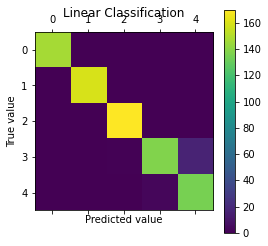

In [ ]:
start_time = time.time()

#creating a class for linear SVC
class_SVC =svm.LinearSVC(C=1.0, max_iter = 5000) #classifier was not converging with auto setting
Y_pred1=class_SVC.fit(X_train,Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat1=confusion_matrix(Y_test,Y_pred1)
acc1=accuracy_score(Y_test,Y_pred1)
acc1 = 100*acc1
print('Linear Classification')
print(mat1)
print('accuracy')
print(acc1, end = '\n\n')
print(classification_report(Y_test,Y_pred1, target_names=target_names))

pl.matshow(mat1)
pl.title('Linear Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 RBF Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   0 142  14]
 [  0   0   0   0 138]]
accuracy
98.18417639429312

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      0.91      0.95       156
     class 5       0.91      1.00      0.95       138

    accuracy                           0.98       771
   macro avg       0.98      0.98      0.98       771
weighted avg       0.98      0.98      0.98       771



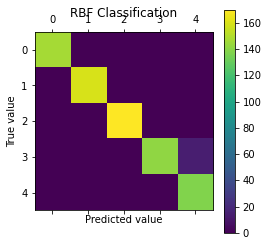

In [ ]:
start_time = time.time()

#creating a class for RBF classification with all the parameters
class_SVC2=svm.SVC(kernel='rbf', C=1, degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
Y_pred2=class_SVC2.fit(X_train,Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat2=confusion_matrix(Y_test,Y_pred2)
acc2=accuracy_score(Y_test,Y_pred2)
acc2 = 100*acc2
print('\n\n\n RBF Classification')
print(mat2)
print('accuracy')
print(acc2, end='\n\n')
print(classification_report(Y_test,Y_pred2, target_names=target_names))

pl.matshow(mat2)
pl.title('RBF Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 RF Classification
[[147   0   0   0   0]
 [  0 159   0   1   0]
 [  0   0 170   0   0]
 [  0   0   0 156   0]
 [  0   0   0   2 136]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      0.99      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       0.98      1.00      0.99       156
     class 5       1.00      0.99      0.99       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



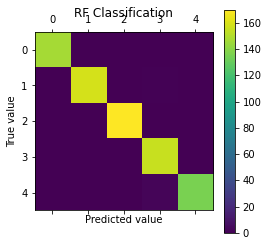

In [ ]:
start_time = time.time()

class_RF = RandomForestClassifier(random_state= 1)
Y_pred3 = class_RF.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat3=confusion_matrix(Y_test,Y_pred3)
acc3=accuracy_score(Y_test,Y_pred3)
acc3 = 100*acc3
print('\n\n\n RF Classification')
print(mat3)
print('accuracy')
print(acc3, end='\n\n')
print(classification_report(Y_test,Y_pred3, target_names=target_names))

pl.matshow(mat3)
pl.title('RF Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 KNN Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   0 156   0]
 [  0   0   0   0 138]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      1.00      1.00       156
     class 5       1.00      1.00      1.00       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



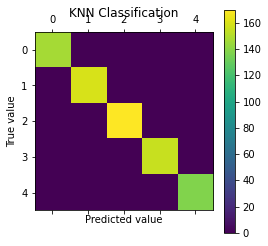

In [ ]:
start_time = time.time()

class_KNN = KNeighborsClassifier()
Y_pred4 = class_KNN.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat4=confusion_matrix(Y_test,Y_pred4)
acc4=accuracy_score(Y_test,Y_pred4)
acc4 = 100*acc4
print('\n\n\n KNN Classification')
print(mat4)
print('accuracy')
print(acc4, end='\n\n')
print(classification_report(Y_test,Y_pred4, target_names=target_names))

pl.matshow(mat4)
pl.title('KNN Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 NB Classification
[[147   0   0   0   0]
 [  0 156   0   4   0]
 [  0   0 170   0   0]
 [  0   0   0 138  18]
 [  0   0   0  11 127]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      0.97      0.99       160
     class 3       1.00      1.00      1.00       170
     class 4       0.90      0.88      0.89       156
     class 5       0.88      0.92      0.90       138

    accuracy                           0.96       771
   macro avg       0.96      0.96      0.96       771
weighted avg       0.96      0.96      0.96       771



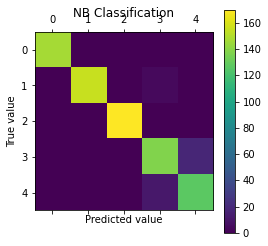

In [ ]:
start_time = time.time()

class_NB = GaussianNB()
Y_pred5 = class_NB.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat5=confusion_matrix(Y_test,Y_pred5)
acc5=accuracy_score(Y_test,Y_pred5)
acc5 = 100*acc5
print('\n\n\n NB Classification')
print(mat5)
print('accuracy')
print(acc5, end='\n\n')
print(classification_report(Y_test,Y_pred5, target_names=target_names))

pl.matshow(mat5)
pl.title('NB Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 Logistic Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   1 135  20]
 [  0   0   0   7 131]]
accuracy
96.36835278858625

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       0.99      1.00      1.00       170
     class 4       0.95      0.87      0.91       156
     class 5       0.87      0.95      0.91       138

    accuracy                           0.96       771
   macro avg       0.96      0.96      0.96       771
weighted avg       0.97      0.96      0.96       771



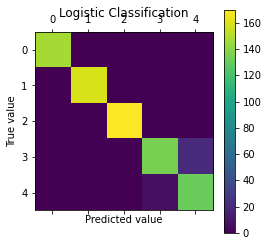

In [ ]:
start_time = time.time()

class_LR = LogisticRegression(max_iter=5000)
Y_pred6 = class_LR.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat6=confusion_matrix(Y_test,Y_pred6)
acc6=accuracy_score(Y_test,Y_pred6)
acc6 = 100*acc6
print('\n\n\n Logistic Classification')
print(mat6)
print('accuracy')
print(acc6, end='\n\n')
print(classification_report(Y_test,Y_pred6, target_names=target_names))

pl.matshow(mat6)
pl.title('Logistic Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 XGB Classification
[[147   0   0   0   0]
 [  0 159   0   0   1]
 [  0   0 170   0   0]
 [  0   0   0 156   0]
 [  0   0   0   0 138]]
accuracy
99.87029831387808

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      0.99      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      1.00      1.00       156
     class 5       0.99      1.00      1.00       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



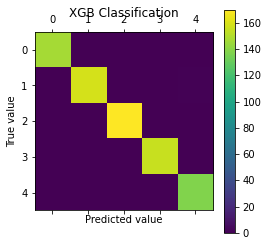

In [ ]:
start_time = time.time()

class_XGB = XGBClassifier()
Y_pred7 = class_XGB.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat7=confusion_matrix(Y_test,Y_pred7)
acc7=accuracy_score(Y_test,Y_pred7)
acc7 = 100*acc7
print('\n\n\n XGB Classification')
print(mat7)
print('accuracy')
print(acc7, end='\n\n')
print(classification_report(Y_test,Y_pred7, target_names=target_names))

pl.matshow(mat7)
pl.title('XGB Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 DT Classification
[[147   0   0   0   0]
 [  0 157   0   2   1]
 [  0   0 170   0   0]
 [  0   0   0 150   6]
 [  0   1   0   5 132]]
accuracy
98.0544747081712

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       0.99      0.98      0.99       160
     class 3       1.00      1.00      1.00       170
     class 4       0.96      0.96      0.96       156
     class 5       0.95      0.96      0.95       138

    accuracy                           0.98       771
   macro avg       0.98      0.98      0.98       771
weighted avg       0.98      0.98      0.98       771



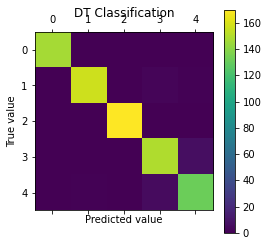

In [ ]:
start_time = time.time()

class_DT = DecisionTreeClassifier(max_depth=5, random_state=1)
Y_pred8 = class_DT.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat8=confusion_matrix(Y_test,Y_pred8)
acc8=accuracy_score(Y_test,Y_pred8)
acc8 = 100*acc8
print('\n\n\n DT Classification')
print(mat8)
print('accuracy')
print(acc8, end='\n\n')
print(classification_report(Y_test,Y_pred8, target_names=target_names))

pl.matshow(mat8)
pl.title('DT Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 Adaboost Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   0 155   1]
 [  0   1   0   1 136]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       0.99      1.00      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       0.99      0.99      0.99       156
     class 5       0.99      0.99      0.99       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



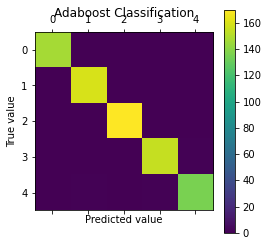

In [ ]:
start_time = time.time()

class_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=1), n_estimators = 300)
Y_pred9 = class_Ada.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat9=confusion_matrix(Y_test,Y_pred9)
acc9=accuracy_score(Y_test,Y_pred9)
acc9 = 100*acc9
print('\n\n\n Adaboost Classification')
print(mat9)
print('accuracy')
print(acc9, end='\n\n')
print(classification_report(Y_test,Y_pred9, target_names=target_names))

pl.matshow(mat9)
pl.title('Adaboost Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 MLP Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   0 156   0]
 [  0   0   0   0 138]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      1.00      1.00       156
     class 5       1.00      1.00      1.00       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



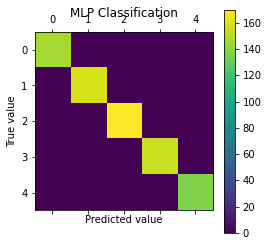

In [ ]:
start_time = time.time()

class_MLP = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 5000)
Y_pred10 = class_MLP.fit(X_train, Y_train).predict(X_test)

time_list.append(time.time()-start_time)


mat10=confusion_matrix(Y_test,Y_pred10)
acc10=accuracy_score(Y_test,Y_pred10)
acc10 = 100*acc10
print('\n\n\n MLP Classification')
print(mat10)
print('accuracy')
print(acc10, end='\n\n')
print(classification_report(Y_test,Y_pred10, target_names=target_names))

pl.matshow(mat10)
pl.title('MLP Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()

# Section 2: Classification of scaled data

In [ ]:
X_train_scaled= Scaler.transform(X_train)
X_test_scaled= Scaler.transform(X_test)

Linear Scaled Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   1 140  15]
 [  0   0   0   0 138]]
accuracy
97.92477302204928

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       0.99      1.00      1.00       170
     class 4       1.00      0.90      0.95       156
     class 5       0.90      1.00      0.95       138

    accuracy                           0.98       771
   macro avg       0.98      0.98      0.98       771
weighted avg       0.98      0.98      0.98       771



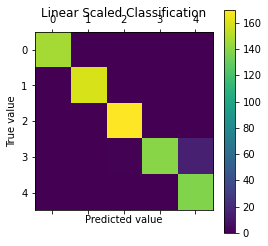

In [ ]:
start_time = time.time()

#creating a class for linear SVC
class_SVC =svm.LinearSVC(C=1.0, max_iter = 5000) #classifier was not converging with auto setting
Y_pred1=class_SVC.fit(X_train_scaled,Y_train).predict(X_test_scaled)

time_list.append(time.time()-start_time)


mat1_s=confusion_matrix(Y_test,Y_pred1)
acc1_s=accuracy_score(Y_test,Y_pred1)
acc1_s = 100*acc1_s
print('Linear Scaled Classification')
print(mat1_s)
print('accuracy')
print(acc1_s, end='\n\n')
print(classification_report(Y_test,Y_pred1, target_names=target_names))

pl.matshow(mat1_s)
pl.title('Linear Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 RBF Scaled Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   0 144  12]
 [  0   0   0   0 138]]
accuracy
98.44357976653697

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      0.92      0.96       156
     class 5       0.92      1.00      0.96       138

    accuracy                           0.98       771
   macro avg       0.98      0.98      0.98       771
weighted avg       0.99      0.98      0.98       771



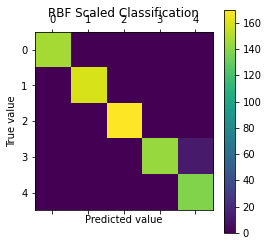

In [ ]:
start_time = time.time()

#creating a class for RBF classification with all the parameters
class_SVC2=svm.SVC(kernel='rbf', C=1, degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
Y_pred2=class_SVC2.fit(X_train_scaled,Y_train).predict(X_test_scaled)

time_list.append(time.time()-start_time)


mat2_s=confusion_matrix(Y_test,Y_pred2)
acc2_s=accuracy_score(Y_test,Y_pred2)
acc2_s = 100*acc2_s
print('\n\n\n RBF Scaled Classification')
print(mat2_s)
print('accuracy')
print(acc2_s,end = '\n\n')
print(classification_report(Y_test,Y_pred2, target_names=target_names))

pl.matshow(mat2_s)
pl.title('RBF Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 RF Scaled Classification
[[147   0   0   0   0]
 [  0 159   0   1   0]
 [  0   0 170   0   0]
 [  0   0   0 156   0]
 [  0   0   0   2 136]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      0.99      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       0.98      1.00      0.99       156
     class 5       1.00      0.99      0.99       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



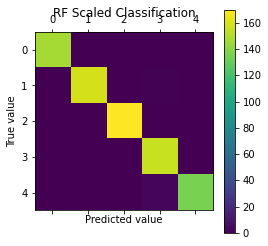

In [ ]:
start_time = time.time()

class_RF = RandomForestClassifier(random_state= 1)
Y_pred3 = class_RF.fit(X_train_scaled, Y_train).predict(X_test_scaled)

time_list.append(time.time()-start_time)


mat3_s=confusion_matrix(Y_test,Y_pred3)
acc3_s=accuracy_score(Y_test,Y_pred3)
acc3_s = 100*acc3_s
print('\n\n\n RF Scaled Classification')
print(mat3_s)
print('accuracy')
print(acc3_s, end='\n\n')
print(classification_report(Y_test,Y_pred3, target_names=target_names))

pl.matshow(mat3_s)
pl.title('RF Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 KNN Scaled Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   0 155   1]
 [  0   0   0   0 138]]
accuracy
99.87029831387808

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      0.99      1.00       156
     class 5       0.99      1.00      1.00       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



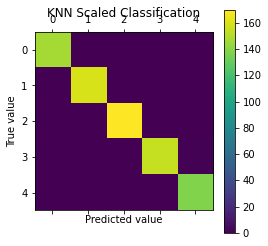

In [ ]:
start_time = time.time()

class_KNN = KNeighborsClassifier()
Y_pred4 = class_KNN.fit(X_train_scaled, Y_train).predict(X_test_scaled)

time_list.append(time.time()-start_time)


mat4_s=confusion_matrix(Y_test,Y_pred4)
acc4_s=accuracy_score(Y_test,Y_pred4)
acc4_s = 100*acc4_s
print('\n\n\n KNN Scaled Classification')
print(mat4_s)
print('accuracy')
print(acc4_s, end='\n\n')
print(classification_report(Y_test,Y_pred4, target_names=target_names))

pl.matshow(mat4_s)
pl.title('KNN Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 NB Scaled Classification
[[147   0   0   0   0]
 [  0 156   0   4   0]
 [  0   0 170   0   0]
 [  0   0   0 138  18]
 [  0   0   0  11 127]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      0.97      0.99       160
     class 3       1.00      1.00      1.00       170
     class 4       0.90      0.88      0.89       156
     class 5       0.88      0.92      0.90       138

    accuracy                           0.96       771
   macro avg       0.96      0.96      0.96       771
weighted avg       0.96      0.96      0.96       771



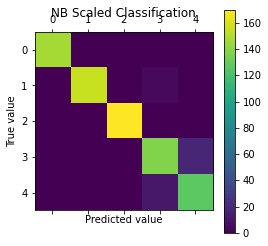

In [ ]:
start_time = time.time()

class_NB = GaussianNB()
Y_pred5 = class_NB.fit(X_train_scaled, Y_train).predict(X_test_scaled)

time_list.append(time.time()-start_time)


mat5_s=confusion_matrix(Y_test,Y_pred5)
acc5_s=accuracy_score(Y_test,Y_pred5)
acc5_s = 100*acc5_s
print('\n\n\n NB Scaled Classification')
print(mat5_s)
print('accuracy')
print(acc5_s, end='\n\n')
print(classification_report(Y_test,Y_pred5, target_names=target_names))

pl.matshow(mat5_s)
pl.title('NB Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 Logistic Scaled Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   1 133  22]
 [  0   0   0   2 136]]
accuracy
96.75745784695201

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       0.99      1.00      1.00       170
     class 4       0.99      0.85      0.91       156
     class 5       0.86      0.99      0.92       138

    accuracy                           0.97       771
   macro avg       0.97      0.97      0.97       771
weighted avg       0.97      0.97      0.97       771



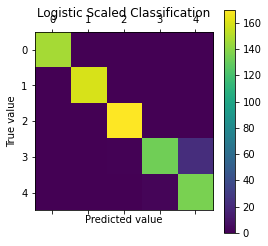

In [ ]:
start_time = time.time()

class_LR = LogisticRegression(max_iter=5000)
Y_pred6 = class_LR.fit(X_train_scaled, Y_train).predict(X_test_scaled)


time_list.append(time.time()-start_time)


mat6_s=confusion_matrix(Y_test,Y_pred6)
acc6_s=accuracy_score(Y_test,Y_pred6)
acc6_s = 100*acc6_s
print('\n\n\n Logistic Scaled Classification')
print(mat6_s)
print('accuracy')
print(acc6_s, end='\n\n')
print(classification_report(Y_test,Y_pred6, target_names=target_names))

pl.matshow(mat6_s)
pl.title('Logistic Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 XGB Scaled Classification
[[147   0   0   0   0]
 [  0 159   0   0   1]
 [  0   0 170   0   0]
 [  0   0   0 156   0]
 [  0   0   0   0 138]]
accuracy
99.87029831387808

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      0.99      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      1.00      1.00       156
     class 5       0.99      1.00      1.00       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



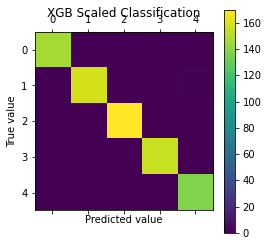

In [ ]:
start_time = time.time()

class_XGB = XGBClassifier()
Y_pred7 = class_XGB.fit(X_train_scaled, Y_train).predict(X_test_scaled)


time_list.append(time.time()-start_time)


mat7_s=confusion_matrix(Y_test,Y_pred7)
acc7_s=accuracy_score(Y_test,Y_pred7)
acc7_s = 100*acc7_s
print('\n\n\n XGB Scaled Classification')
print(mat7_s)
print('accuracy')
print(acc7_s, end='\n\n')
print(classification_report(Y_test,Y_pred7, target_names=target_names))

pl.matshow(mat7_s)
pl.title('XGB Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 DT Scaled Classification
[[147   0   0   0   0]
 [  0 157   0   2   1]
 [  0   0 170   0   0]
 [  0   0   0 150   6]
 [  0   1   0   5 132]]
accuracy
98.0544747081712

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       0.99      0.98      0.99       160
     class 3       1.00      1.00      1.00       170
     class 4       0.96      0.96      0.96       156
     class 5       0.95      0.96      0.95       138

    accuracy                           0.98       771
   macro avg       0.98      0.98      0.98       771
weighted avg       0.98      0.98      0.98       771



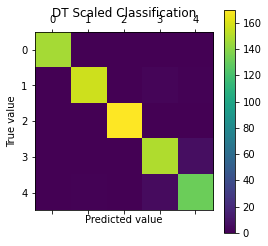

In [ ]:
start_time = time.time()

class_DT = DecisionTreeClassifier(max_depth=5, random_state=1)
Y_pred8 = class_DT.fit(X_train_scaled, Y_train).predict(X_test_scaled)


time_list.append(time.time()-start_time)


mat8_s=confusion_matrix(Y_test,Y_pred8)
acc8_s=accuracy_score(Y_test,Y_pred8)
acc8_s = 100*acc8_s
print('\n\n\n DT Scaled Classification')
print(mat8_s)
print('accuracy')
print(acc8_s, end='\n\n')
print(classification_report(Y_test,Y_pred8, target_names=target_names))

pl.matshow(mat8)
pl.title('DT Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 Adaboost Scaled Classification
[[147   0   0   0   0]
 [  0 159   0   1   0]
 [  0   0 170   0   0]
 [  0   0   0 155   1]
 [  0   1   0   0 137]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       0.99      0.99      0.99       160
     class 3       1.00      1.00      1.00       170
     class 4       0.99      0.99      0.99       156
     class 5       0.99      0.99      0.99       138

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



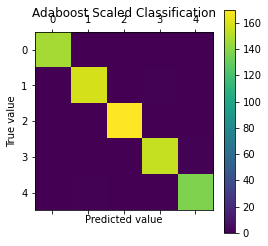

In [ ]:
start_time = time.time()

class_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=1), n_estimators = 300)
Y_pred9 = class_Ada.fit(X_train_scaled, Y_train).predict(X_test_scaled)

time_list.append(time.time()-start_time)

mat9_s=confusion_matrix(Y_test,Y_pred9)
acc9_s=accuracy_score(Y_test,Y_pred9)
acc9_s = 100*acc9_s
print('\n\n\n Adaboost Scaled Classification')
print(mat9_s)
print('accuracy')
print(acc9_s, end='\n\n')
print(classification_report(Y_test,Y_pred9, target_names=target_names))

pl.matshow(mat9_s)
pl.title('Adaboost Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()




 MLP Scaled Classification
[[147   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 170   0   0]
 [  0   0   0 150   6]
 [  0   0   0   0 138]]
accuracy
99.22178988326849

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       147
     class 2       1.00      1.00      1.00       160
     class 3       1.00      1.00      1.00       170
     class 4       1.00      0.96      0.98       156
     class 5       0.96      1.00      0.98       138

    accuracy                           0.99       771
   macro avg       0.99      0.99      0.99       771
weighted avg       0.99      0.99      0.99       771



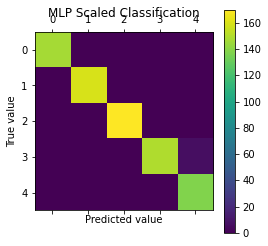

In [ ]:
start_time = time.time()

class_MLP = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 5000)
Y_pred10 = class_MLP.fit(X_train_scaled, Y_train).predict(X_test_scaled)

time_list.append(time.time()-start_time)

mat10_s=confusion_matrix(Y_test,Y_pred10)
acc10_s=accuracy_score(Y_test,Y_pred10)
acc10_s = 100*acc10_s
print('\n\n\n MLP Scaled Classification')
print(mat10_s)
print('accuracy')
print(acc10_s, end='\n\n')
print(classification_report(Y_test,Y_pred10, target_names=target_names))

pl.matshow(mat10_s)
pl.title('MLP Scaled Classification')
pl.colorbar()
pl.ylabel('True value')
pl.xlabel('Predicted value')
pl.show()


# Section 3: Cross-Validation


* Fold 1 *


 Linear Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  1 43  7]
 [ 0  0  0  0 51]]
accuracy
96.88715953307393

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       0.98      1.00      0.99        51
     class 4       1.00      0.84      0.91        51
     class 5       0.88      1.00      0.94        51

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



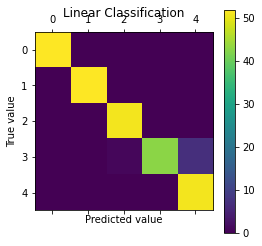



 RBF Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 47  4]
 [ 0  0  0  0 51]]
accuracy
98.44357976653697

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.92      0.96        51
     class 5       0.93      1.00      0.96        51

    accuracy                           0.98       257
   macro avg       0.99      0.98      0.98       257
weighted avg       0.99      0.98      0.98       257



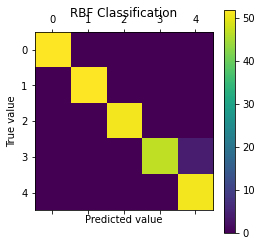



 RF Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



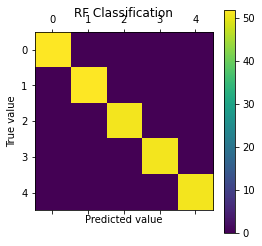



 KNN Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



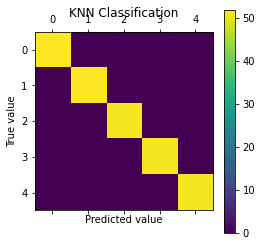



 NB Classification
[[52  0  0  0  0]
 [ 0 51  0  1  0]
 [ 0  0 51  0  0]
 [ 0  0  0 45  6]
 [ 0  0  0  2 49]]
accuracy
96.49805447470817

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       0.94      0.88      0.91        51
     class 5       0.89      0.96      0.92        51

    accuracy                           0.96       257
   macro avg       0.97      0.96      0.96       257
weighted avg       0.97      0.96      0.97       257



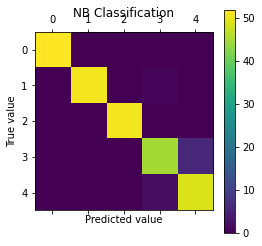



 Logistic Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  1 44  6]
 [ 0  0  0  3 48]]
accuracy
96.10894941634241

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       0.98      1.00      0.99        51
     class 4       0.94      0.86      0.90        51
     class 5       0.89      0.94      0.91        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



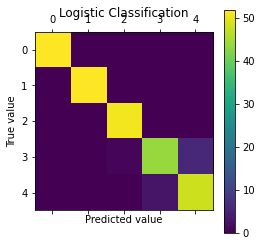



 XGB Classification
[[52  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



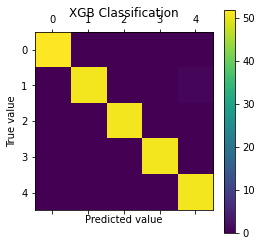



 DT Classification
[[52  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 49  2]
 [ 0  0  0  1 50]]
accuracy
98.44357976653697

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       0.98      0.96      0.97        51
     class 5       0.94      0.98      0.96        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



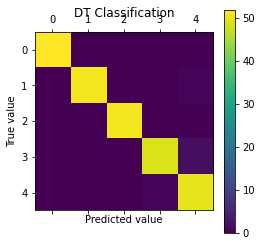



 Ada Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



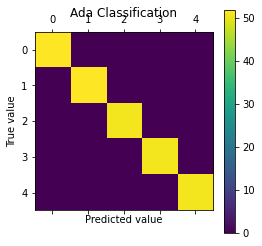



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



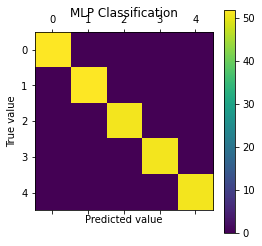


* Fold 2 *


 Linear Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  1 46  4]
 [ 0  0  0  0 51]]
accuracy
98.0544747081712

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       0.98      1.00      0.99        51
     class 4       1.00      0.90      0.95        51
     class 5       0.93      1.00      0.96        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



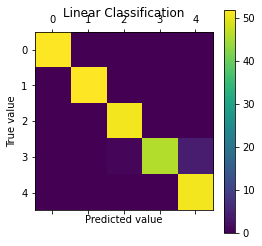



 RBF Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 48  3]
 [ 0  0  0  0 51]]
accuracy
98.83268482490273

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.94      0.97        51
     class 5       0.94      1.00      0.97        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



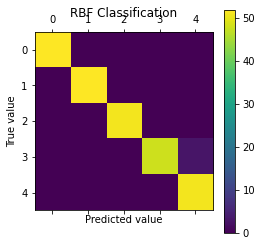



 RF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



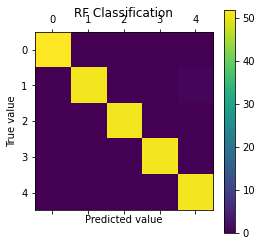



 KNN Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



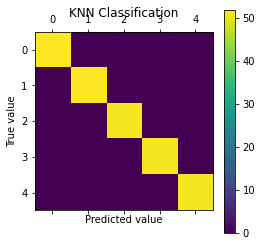



 NB Classification
[[52  0  0  0  0]
 [ 0 49  0  3  0]
 [ 0  0 51  0  0]
 [ 0  0  0 45  6]
 [ 0  0  0  2 49]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.94      0.97        52
     class 3       1.00      1.00      1.00        51
     class 4       0.90      0.88      0.89        51
     class 5       0.89      0.96      0.92        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



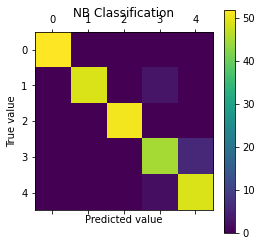



 Logistic Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  1 47  3]
 [ 0  0  0  2 49]]
accuracy
97.66536964980544

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       0.98      1.00      0.99        51
     class 4       0.96      0.92      0.94        51
     class 5       0.94      0.96      0.95        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



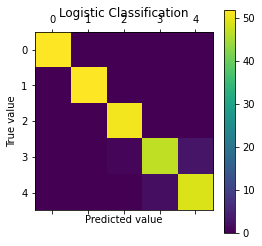



 XGB Classification
[[52  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



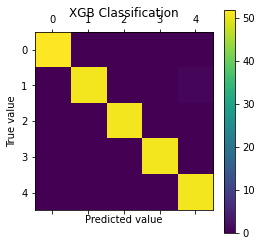



 DT Classification
[[52  0  0  0  0]
 [ 0 50  0  0  2]
 [ 0  0 51  0  0]
 [ 0  0  0 49  2]
 [ 0  0  0  1 50]]
accuracy
98.0544747081712

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.96      0.98        52
     class 3       1.00      1.00      1.00        51
     class 4       0.98      0.96      0.97        51
     class 5       0.93      0.98      0.95        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



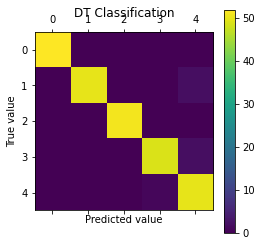



 Ada Classification
[[52  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



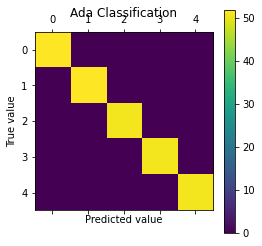



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



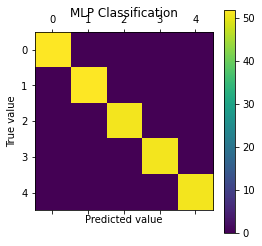


* Fold 3 *


 Linear Classification
[[52  0  0  0  0]
 [ 0 50  0  0  1]
 [ 0  0 52  0  0]
 [ 0  0  0 46  5]
 [ 0  0  0  0 51]]
accuracy
97.66536964980544

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      0.90      0.95        51
     class 5       0.89      1.00      0.94        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



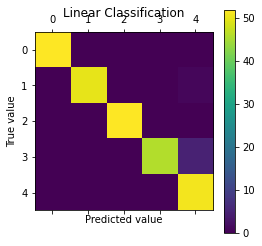



 RBF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 46  5]
 [ 0  0  0  0 51]]
accuracy
98.0544747081712

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      0.90      0.95        51
     class 5       0.91      1.00      0.95        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



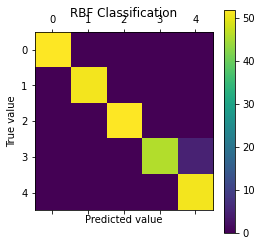



 RF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



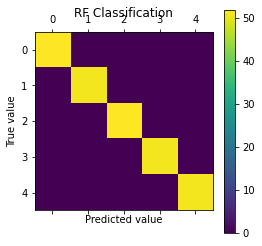



 KNN Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



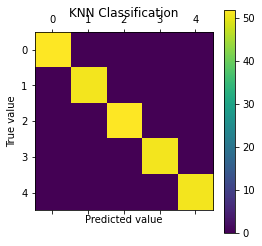



 NB Classification
[[52  0  0  0  0]
 [ 0 47  0  4  0]
 [ 0  0 52  0  0]
 [ 0  0  0 46  5]
 [ 0  0  0  2 49]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.92      0.96        51
     class 3       1.00      1.00      1.00        52
     class 4       0.88      0.90      0.89        51
     class 5       0.91      0.96      0.93        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



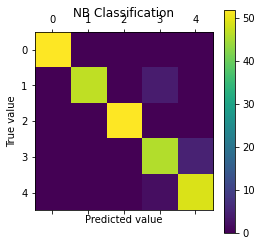



 Logistic Classification
[[52  0  0  0  0]
 [ 0 49  0  0  2]
 [ 0  0 52  0  0]
 [ 0  0  0 45  6]
 [ 0  0  0  1 50]]
accuracy
96.49805447470817

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.96      0.98        51
     class 3       1.00      1.00      1.00        52
     class 4       0.98      0.88      0.93        51
     class 5       0.86      0.98      0.92        51

    accuracy                           0.96       257
   macro avg       0.97      0.96      0.97       257
weighted avg       0.97      0.96      0.97       257



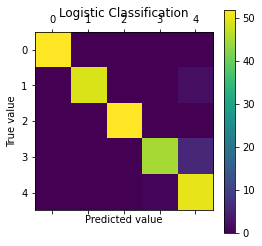



 XGB Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



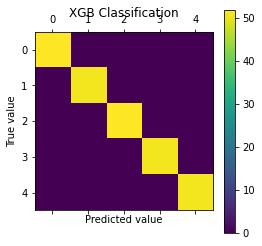



 DT Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  1  0 50  0]
 [ 0  0  0  1 50]]
accuracy
99.22178988326849

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       0.98      1.00      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       0.98      0.98      0.98        51
     class 5       1.00      0.98      0.99        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



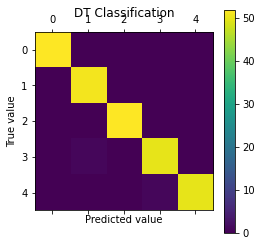



 Ada Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  1  0 50  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       0.98      1.00      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      0.98      0.99        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



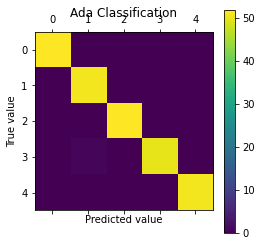



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



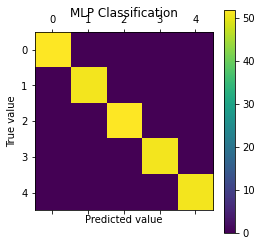


* Fold 4 *


 Linear Classification
[[52  0  0  0  0]
 [ 0 49  0  0  2]
 [ 0  0 52  0  0]
 [ 0  0  0 42  9]
 [ 0  0  0  0 51]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.96      0.98        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      0.82      0.90        51
     class 5       0.82      1.00      0.90        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



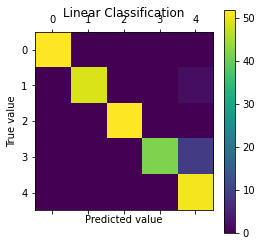



 RBF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 47  4]
 [ 0  0  0  0 51]]
accuracy
98.44357976653697

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      0.92      0.96        51
     class 5       0.93      1.00      0.96        51

    accuracy                           0.98       257
   macro avg       0.99      0.98      0.98       257
weighted avg       0.99      0.98      0.98       257



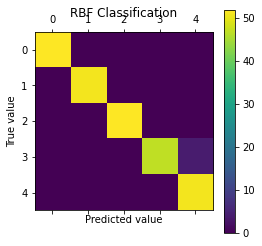



 RF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



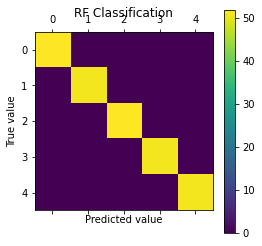



 KNN Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



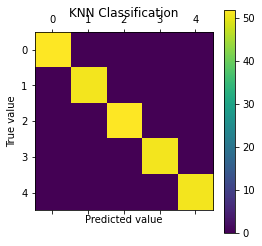



 NB Classification
[[52  0  0  0  0]
 [ 0 48  0  3  0]
 [ 0  0 52  0  0]
 [ 0  0  0 43  8]
 [ 0  0  0  2 49]]
accuracy
94.94163424124513

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.94      0.97        51
     class 3       1.00      1.00      1.00        52
     class 4       0.90      0.84      0.87        51
     class 5       0.86      0.96      0.91        51

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



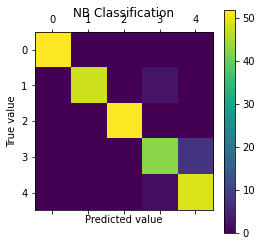



 Logistic Classification
[[52  0  0  0  0]
 [ 0 49  0  0  2]
 [ 0  0 52  0  0]
 [ 0  0  0 42  9]
 [ 0  0  0  3 48]]
accuracy
94.55252918287937

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.96      0.98        51
     class 3       1.00      1.00      1.00        52
     class 4       0.93      0.82      0.87        51
     class 5       0.81      0.94      0.87        51

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



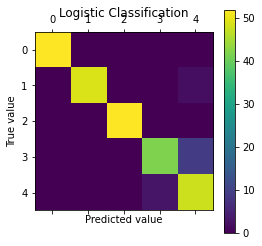



 XGB Classification
[[52  0  0  0  0]
 [ 0 50  0  0  1]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



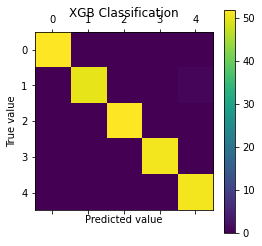



 DT Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  1  0  1 49]]
accuracy
99.22178988326849

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       0.98      1.00      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       0.98      1.00      0.99        51
     class 5       1.00      0.96      0.98        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



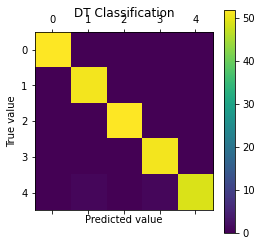



 Ada Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  1  0  1 49]]
accuracy
99.22178988326849

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       0.98      1.00      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       0.98      1.00      0.99        51
     class 5       1.00      0.96      0.98        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



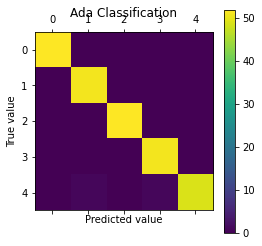



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



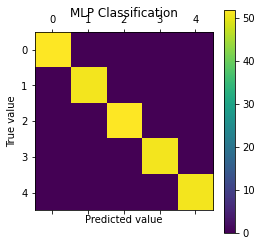


* Fold 5 *


 Linear Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 47  4]
 [ 0  0  0  0 51]]
accuracy
98.44357976653697

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      0.92      0.96        51
     class 5       0.93      1.00      0.96        51

    accuracy                           0.98       257
   macro avg       0.99      0.98      0.98       257
weighted avg       0.99      0.98      0.98       257



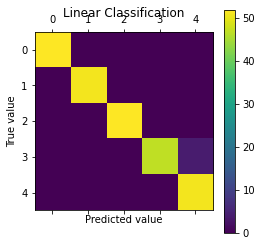



 RBF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 50  1]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      0.98      0.99        51
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



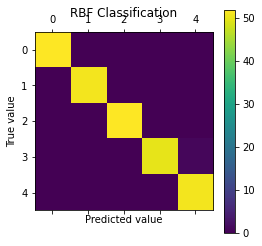



 RF Classification
[[52  0  0  0  0]
 [ 0 50  0  1  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       0.98      1.00      0.99        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



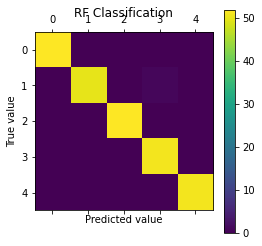



 KNN Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



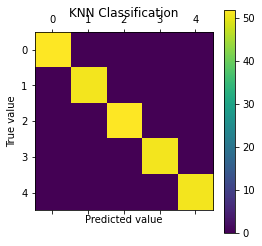



 NB Classification
[[52  0  0  0  0]
 [ 0 49  0  2  0]
 [ 0  0 52  0  0]
 [ 0  0  0 46  5]
 [ 0  0  0  1 50]]
accuracy
96.88715953307393

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.96      0.98        51
     class 3       1.00      1.00      1.00        52
     class 4       0.94      0.90      0.92        51
     class 5       0.91      0.98      0.94        51

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



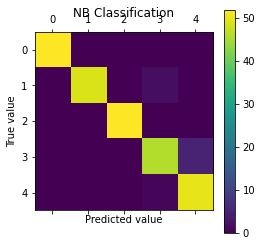



 Logistic Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 46  5]
 [ 0  0  0  1 50]]
accuracy
97.66536964980544

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       0.98      0.90      0.94        51
     class 5       0.91      0.98      0.94        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



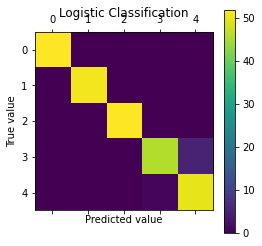



 XGB Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



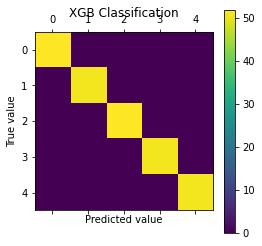



 DT Classification
[[52  0  0  0  0]
 [ 0 49  0  1  1]
 [ 0  0 52  0  0]
 [ 0  0  0 50  1]
 [ 0  0  0  0 51]]
accuracy
98.83268482490273

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.96      0.98        51
     class 3       1.00      1.00      1.00        52
     class 4       0.98      0.98      0.98        51
     class 5       0.96      1.00      0.98        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



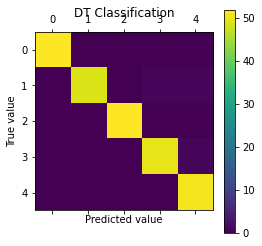



 Ada Classification
[[52  0  0  0  0]
 [ 0 50  0  0  1]
 [ 0  0 52  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



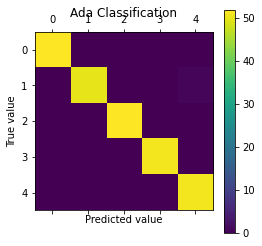



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        52
     class 4       1.00      1.00      1.00        51
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



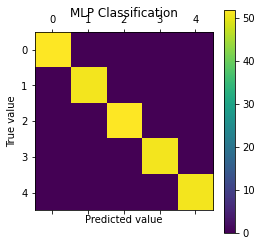


* Fold 6 *


 Linear Classification
[[52  0  0  0  0]
 [ 0 50  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  1 44  7]
 [ 0  0  0  1 50]]
accuracy
96.10894941634241

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.98      0.99        51
     class 3       0.98      1.00      0.99        51
     class 4       0.98      0.85      0.91        52
     class 5       0.86      0.98      0.92        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



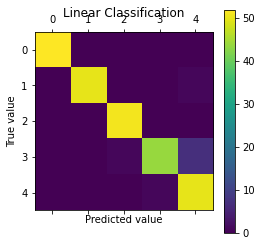



 RBF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 48  4]
 [ 0  0  0  0 51]]
accuracy
98.44357976653697

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.92      0.96        52
     class 5       0.93      1.00      0.96        51

    accuracy                           0.98       257
   macro avg       0.99      0.98      0.98       257
weighted avg       0.99      0.98      0.98       257



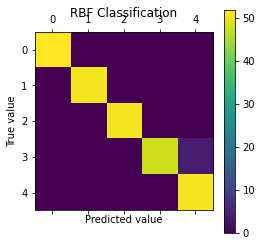



 RF Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



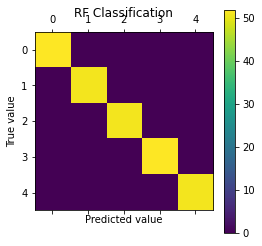



 KNN Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



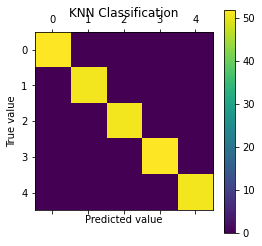



 NB Classification
[[52  0  0  0  0]
 [ 0 48  0  3  0]
 [ 0  0 51  0  0]
 [ 0  0  0 44  8]
 [ 0  0  0  3 48]]
accuracy
94.55252918287937

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.94      0.97        51
     class 3       1.00      1.00      1.00        51
     class 4       0.88      0.85      0.86        52
     class 5       0.86      0.94      0.90        51

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



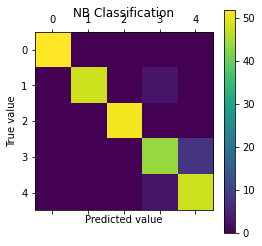



 Logistic Classification
[[52  0  0  0  0]
 [ 0 49  0  0  2]
 [ 0  0 51  0  0]
 [ 0  0  1 44  7]
 [ 0  0  0  3 48]]
accuracy
94.94163424124513

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      0.96      0.98        51
     class 3       0.98      1.00      0.99        51
     class 4       0.94      0.85      0.89        52
     class 5       0.84      0.94      0.89        51

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



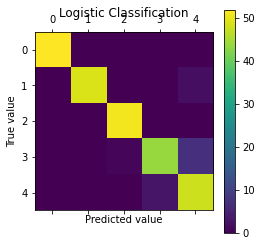



 XGB Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



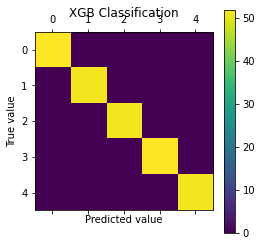



 DT Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  1]
 [ 0  0  0  2 49]]
accuracy
98.83268482490273

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        51
     class 4       0.96      0.98      0.97        52
     class 5       0.98      0.96      0.97        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



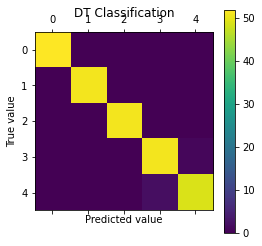



 Ada Classification
[[52  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  1 51  0]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       0.98      1.00      0.99        51
     class 4       1.00      0.98      0.99        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



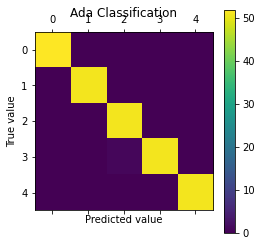



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        52
     class 2       1.00      1.00      1.00        51
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



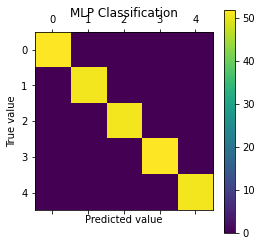


* Fold 7 *


 Linear Classification
[[51  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 42 10]
 [ 0  0  0  1 50]]
accuracy
95.3307392996109

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       0.98      0.81      0.88        52
     class 5       0.82      0.98      0.89        51

    accuracy                           0.95       257
   macro avg       0.96      0.95      0.95       257
weighted avg       0.96      0.95      0.95       257



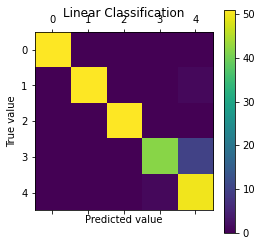



 RBF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 44  8]
 [ 0  0  0  0 51]]
accuracy
96.88715953307393

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.85      0.92        52
     class 5       0.86      1.00      0.93        51

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



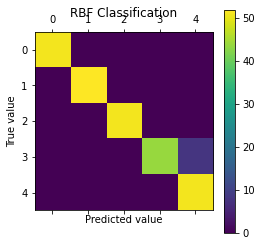



 RF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



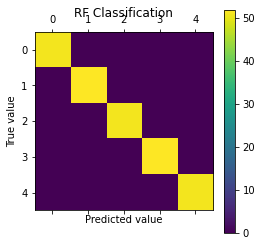



 KNN Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  1]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.98      0.99        52
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



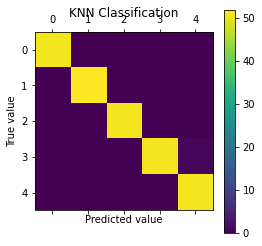



 NB Classification
[[51  0  0  0  0]
 [ 0 51  0  1  0]
 [ 0  0 51  0  0]
 [ 0  0  0 43  9]
 [ 0  0  0  2 49]]
accuracy
95.3307392996109

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       0.93      0.83      0.88        52
     class 5       0.84      0.96      0.90        51

    accuracy                           0.95       257
   macro avg       0.96      0.95      0.95       257
weighted avg       0.96      0.95      0.95       257



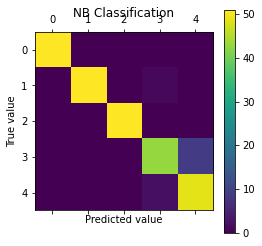



 Logistic Classification
[[51  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 42 10]
 [ 0  0  0  1 50]]
accuracy
95.3307392996109

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       0.98      0.81      0.88        52
     class 5       0.82      0.98      0.89        51

    accuracy                           0.95       257
   macro avg       0.96      0.95      0.95       257
weighted avg       0.96      0.95      0.95       257



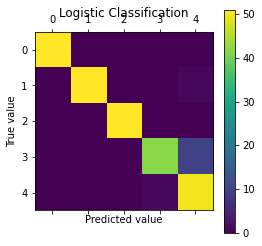



 XGB Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



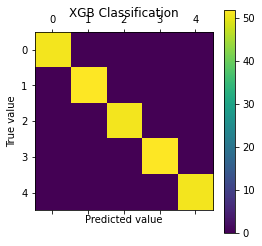



 DT Classification
[[51  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 48  4]
 [ 0  0  0  1 50]]
accuracy
97.66536964980544

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       0.98      0.92      0.95        52
     class 5       0.91      0.98      0.94        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



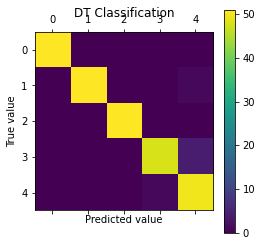



 Ada Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  1 50]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       0.98      1.00      0.99        52
     class 5       1.00      0.98      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



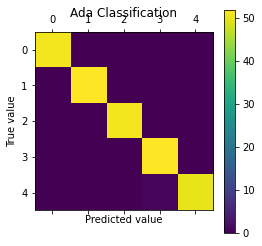



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



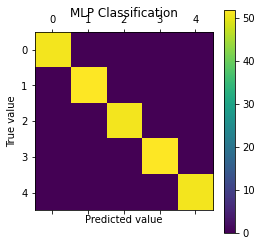


* Fold 8 *


 Linear Classification
[[51  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 42 10]
 [ 0  0  0  0 51]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.81      0.89        52
     class 5       0.82      1.00      0.90        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



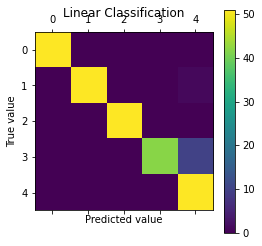



 RBF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 49  3]
 [ 0  0  0  0 51]]
accuracy
98.83268482490273

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.94      0.97        52
     class 5       0.94      1.00      0.97        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



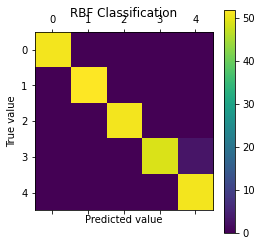



 RF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



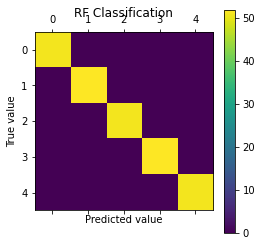



 KNN Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



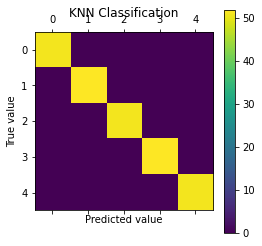



 NB Classification
[[51  0  0  0  0]
 [ 0 51  0  1  0]
 [ 0  0 48  3  0]
 [ 0  0  0 43  9]
 [ 0  0  0  3 48]]
accuracy
93.77431906614785

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      0.94      0.97        51
     class 4       0.86      0.83      0.84        52
     class 5       0.84      0.94      0.89        51

    accuracy                           0.94       257
   macro avg       0.94      0.94      0.94       257
weighted avg       0.94      0.94      0.94       257



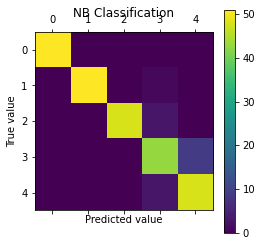



 Logistic Classification
[[51  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 50  1  0]
 [ 0  0  0 43  9]
 [ 0  0  0  2 49]]
accuracy
94.94163424124513

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      0.98      0.99        51
     class 4       0.93      0.83      0.88        52
     class 5       0.83      0.96      0.89        51

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



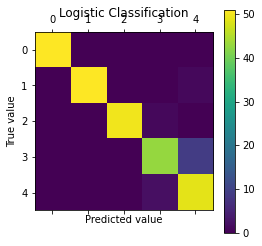



 XGB Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 49  2  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
99.22178988326849

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      0.96      0.98        51
     class 4       0.96      1.00      0.98        52
     class 5       1.00      1.00      1.00        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



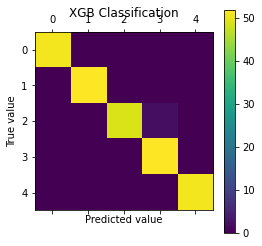



 DT Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 51  1]
 [ 0  0  0  0 51]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.98      0.99        52
     class 5       0.98      1.00      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



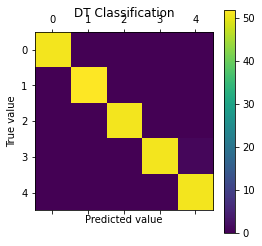



 Ada Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  1  0 51  0]
 [ 0  1  0  0 50]]
accuracy
99.22178988326849

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       0.96      1.00      0.98        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.98      0.99        52
     class 5       1.00      0.98      0.99        51

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



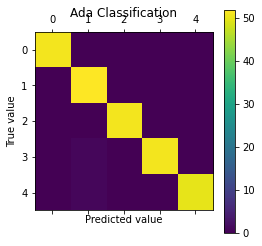



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



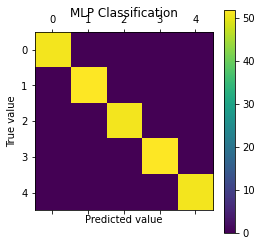


* Fold 9 *


 Linear Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 50  1  0]
 [ 0  0  1 42  9]
 [ 0  0  0  0 51]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       0.98      0.98      0.98        51
     class 4       0.98      0.81      0.88        52
     class 5       0.85      1.00      0.92        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



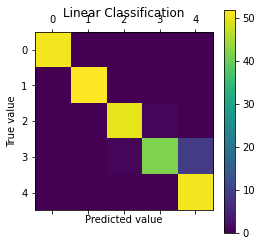



 RBF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 47  5]
 [ 0  0  0  0 51]]
accuracy
98.0544747081712

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.90      0.95        52
     class 5       0.91      1.00      0.95        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



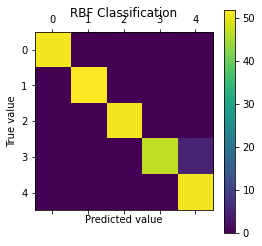



 RF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



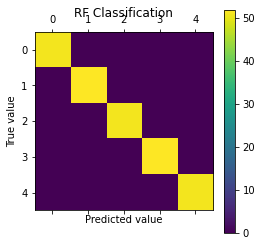



 KNN Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



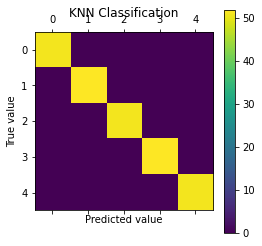



 NB Classification
[[51  0  0  0  0]
 [ 0 51  0  1  0]
 [ 0  0 50  1  0]
 [ 0  0  0 46  6]
 [ 0  0  0  2 49]]
accuracy
96.10894941634241

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      0.98      0.99        51
     class 4       0.92      0.88      0.90        52
     class 5       0.89      0.96      0.92        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



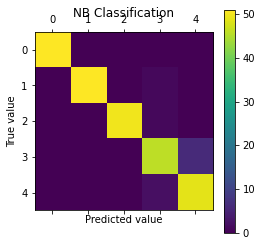



 Logistic Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 50  1  0]
 [ 0  0  1 42  9]
 [ 0  0  0  0 51]]
accuracy
95.71984435797665

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       0.98      0.98      0.98        51
     class 4       0.98      0.81      0.88        52
     class 5       0.85      1.00      0.92        51

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



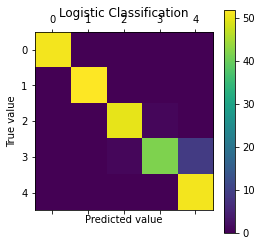



 XGB Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 51]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



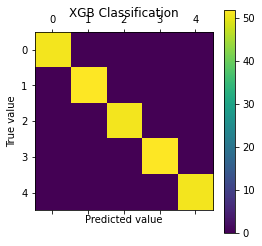



 DT Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 49  3]
 [ 0  1  0  0 50]]
accuracy
98.44357976653697

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       0.98      1.00      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.94      0.97        52
     class 5       0.94      0.98      0.96        51

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



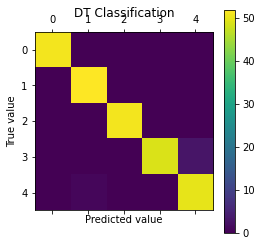



 Ada Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  1  0  0 50]]
accuracy
99.61089494163424

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       0.98      1.00      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      0.98      0.99        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



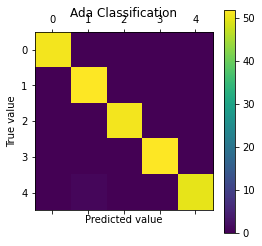



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        51

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



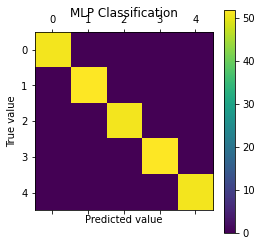


* Fold 10 *


 Linear Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 46  6]
 [ 0  0  0  0 50]]
accuracy
97.65625

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.88      0.94        52
     class 5       0.89      1.00      0.94        50

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256



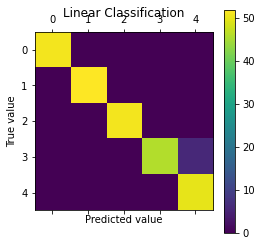



 RBF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 47  5]
 [ 0  0  0  0 50]]
accuracy
98.046875

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.90      0.95        52
     class 5       0.91      1.00      0.95        50

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256



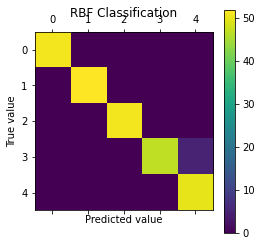



 RF Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 50]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        50

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



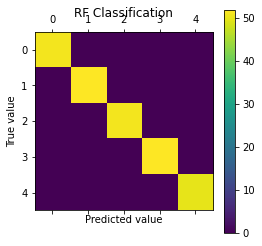



 KNN Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 50]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        50

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



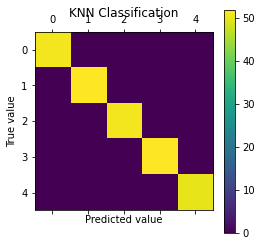



 NB Classification
[[51  0  0  0  0]
 [ 0 51  0  1  0]
 [ 0  0 51  0  0]
 [ 0  0  0 48  4]
 [ 0  0  0  4 46]]
accuracy
96.484375

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       0.91      0.92      0.91        52
     class 5       0.92      0.92      0.92        50

    accuracy                           0.96       256
   macro avg       0.97      0.96      0.96       256
weighted avg       0.97      0.96      0.96       256



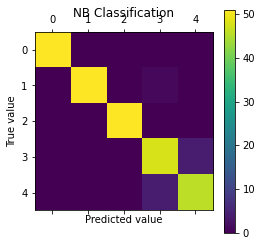



 Logistic Classification
[[51  0  0  0  0]
 [ 0 50  0  0  2]
 [ 0  0 51  0  0]
 [ 0  0  0 46  6]
 [ 0  0  0  2 48]]
accuracy
96.09375

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.96      0.98        52
     class 3       1.00      1.00      1.00        51
     class 4       0.96      0.88      0.92        52
     class 5       0.86      0.96      0.91        50

    accuracy                           0.96       256
   macro avg       0.96      0.96      0.96       256
weighted avg       0.96      0.96      0.96       256



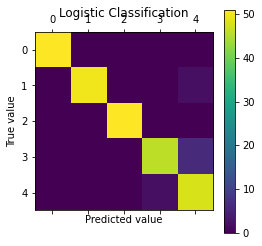



 XGB Classification
[[51  0  0  0  0]
 [ 0 52  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 50]]
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        50

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



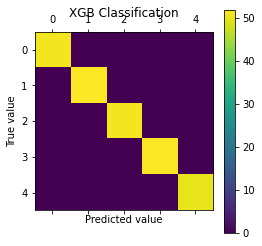



 DT Classification
[[51  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 50  2]
 [ 0  0  0  0 50]]
accuracy
98.828125

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      0.96      0.98        52
     class 5       0.94      1.00      0.97        50

    accuracy                           0.99       256
   macro avg       0.99      0.99      0.99       256
weighted avg       0.99      0.99      0.99       256



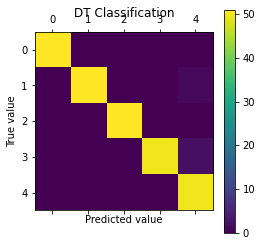



 Ada Classification
[[51  0  0  0  0]
 [ 0 51  0  0  1]
 [ 0  0 51  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 50]]
accuracy
99.609375

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      0.98      0.99        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       0.98      1.00      0.99        50

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



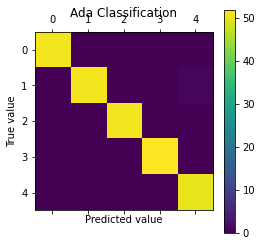



 MLP Classification
accuracy
100.0

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        51
     class 2       1.00      1.00      1.00        52
     class 3       1.00      1.00      1.00        51
     class 4       1.00      1.00      1.00        52
     class 5       1.00      1.00      1.00        50

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



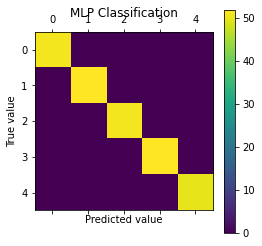


List of possible accuracy for classifier 0 is:  [96.88715953307393, 98.0544747081712, 97.66536964980544, 95.71984435797665, 98.44357976653697, 96.10894941634241, 95.3307392996109, 95.71984435797665, 95.71984435797665, 97.65625]
Mean:  96.73060554474708

List of possible accuracy for classifier 1 is:  [98.44357976653697, 98.83268482490273, 98.0544747081712, 98.44357976653697, 99.61089494163424, 98.44357976653697, 96.88715953307393, 98.83268482490273, 98.0544747081712, 98.046875]
Mean:  98.3649987840467

List of possible accuracy for classifier 2 is:  [100.0, 99.61089494163424, 100.0, 100.0, 99.61089494163424, 100.0, 100.0, 100.0, 100.0, 100.0]
Mean:  99.92217898832685

List of possible accuracy for classifier 3 is:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.61089494163424, 100.0, 100.0, 100.0]
Mean:  99.96108949416342

List of possible accuracy for classifier 4 is:  [96.49805447470817, 95.71984435797665, 95.71984435797665, 94.94163424124513, 96.88715953307393, 94.55252918287937, 95

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, shuffle = True) 

lst = [[] for variable in range(10)]
lst2 = []
q = 1
for train_index, test_index in skf.split(X,Y):
  X_train, X_test = X[train_index], X[test_index] 
  Y_train, Y_test = Y[train_index], Y[test_index]
  
  print("\n* Fold",q,"*")
  q = q+1

  #part1
  class_SVC =svm.LinearSVC(C=1.0, max_iter = 5000)
  Y_pred1_cv = class_SVC.fit(X_train, Y_train).predict(X_test)

  mat1_cv=confusion_matrix(Y_test,Y_pred1_cv)
  acc1_cv=accuracy_score(Y_test,Y_pred1_cv)
  acc1_cv = acc1_cv*100
  lst[0].append(acc1_cv)
  print('\n\n Linear Classification')
  print(mat1_cv)
  print('accuracy')
  print(acc1_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred1_cv, target_names=target_names))
  pl.matshow(mat1_cv)
  pl.title('Linear Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part2
  class_SVC2=svm.SVC(kernel='rbf', C=1, degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
  Y_pred2_cv = class_SVC2.fit(X_train, Y_train).predict(X_test)

  mat2_cv=confusion_matrix(Y_test,Y_pred2_cv)
  acc2_cv=accuracy_score(Y_test,Y_pred2_cv)
  acc2_cv = acc2_cv*100
  lst[1].append(acc2_cv)
  print('\n\n RBF Classification')
  print(mat2_cv)
  print('accuracy')
  print(acc2_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred2_cv, target_names=target_names))
  pl.matshow(mat2_cv)
  pl.title('RBF Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part3
  class_RF = RandomForestClassifier(random_state= 1)
  Y_pred3_cv = class_RF.fit(X_train, Y_train).predict(X_test)

  mat3_cv=confusion_matrix(Y_test,Y_pred3_cv)
  acc3_cv=accuracy_score(Y_test,Y_pred3_cv)
  acc3_cv = acc3_cv*100
  lst[2].append(acc3_cv)
  print('\n\n RF Classification')
  print(mat3_cv)
  print('accuracy')
  print(acc3_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred3_cv, target_names=target_names))
  pl.matshow(mat3_cv)
  pl.title('RF Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part4
  class_KNN = KNeighborsClassifier()
  Y_pred4_cv = class_KNN.fit(X_train, Y_train).predict(X_test)

  mat4_cv=confusion_matrix(Y_test,Y_pred4_cv)
  acc4_cv=accuracy_score(Y_test,Y_pred4_cv)
  acc4_cv = acc4_cv*100
  lst[3].append(acc4_cv)
  print('\n\n KNN Classification')
  print(mat4_cv)
  print('accuracy')
  print(acc4_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred4_cv, target_names=target_names))
  pl.matshow(mat4_cv)
  pl.title('KNN Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part5
  class_NB = GaussianNB()
  Y_pred5_cv = class_NB.fit(X_train, Y_train).predict(X_test)

  mat5_cv=confusion_matrix(Y_test,Y_pred5_cv)
  acc5_cv=accuracy_score(Y_test,Y_pred5_cv)
  acc5_cv = acc5_cv*100
  lst[4].append(acc5_cv)
  print('\n\n NB Classification')
  print(mat5_cv)
  print('accuracy')
  print(acc5_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred5_cv, target_names=target_names))
  pl.matshow(mat5_cv)
  pl.title('NB Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part6
  class_LR = LogisticRegression(max_iter=5000)
  Y_pred6_cv = class_LR.fit(X_train, Y_train).predict(X_test)

  mat6_cv=confusion_matrix(Y_test,Y_pred6_cv)
  acc6_cv=accuracy_score(Y_test,Y_pred6_cv)
  acc6_cv = acc6_cv*100
  lst[5].append(acc6_cv)
  print('\n\n Logistic Classification')
  print(mat6_cv)
  print('accuracy')
  print(acc6_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred6_cv, target_names=target_names))
  pl.matshow(mat6_cv)
  pl.title('Logistic Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part7
  class_XGB = XGBClassifier()
  Y_pred7_cv = class_XGB.fit(X_train, Y_train).predict(X_test)

  mat7_cv=confusion_matrix(Y_test,Y_pred7_cv)
  acc7_cv=accuracy_score(Y_test,Y_pred7_cv)
  acc7_cv = acc7_cv*100
  lst[6].append(acc7_cv)
  print('\n\n XGB Classification')
  print(mat7_cv)
  print('accuracy')
  print(acc7_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred7_cv, target_names=target_names))
  pl.matshow(mat7_cv)
  pl.title('XGB Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part8
  class_DT = DecisionTreeClassifier(max_depth=5, random_state=1)
  Y_pred8_cv = class_DT.fit(X_train, Y_train).predict(X_test)

  mat8_cv=confusion_matrix(Y_test,Y_pred8_cv)
  acc8_cv=accuracy_score(Y_test,Y_pred8_cv)
  acc8_cv = acc8_cv*100
  lst[7].append(acc8_cv)
  print('\n\n DT Classification')
  print(mat8_cv)
  print('accuracy')
  print(acc8_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred8_cv, target_names=target_names))
  pl.matshow(mat8_cv)
  pl.title('DT Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part9
  class_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=1), n_estimators = 300)
  Y_pred9_cv = class_Ada.fit(X_train, Y_train).predict(X_test)

  mat9_cv=confusion_matrix(Y_test,Y_pred9_cv)
  acc9_cv=accuracy_score(Y_test,Y_pred9_cv)
  acc9_cv = acc9_cv*100
  lst[8].append(acc9_cv)
  print('\n\n Ada Classification')
  print(mat9_cv)
  print('accuracy')
  print(acc9_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred9_cv, target_names=target_names))
  pl.matshow(mat9_cv)
  pl.title('Ada Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()
  
  #part10
  class_MLP = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 5000)
  Y_pred10_cv = class_MLP.fit(X_train, Y_train).predict(X_test)

  mat10_cv=confusion_matrix(Y_test,Y_pred10_cv)
  acc10_cv=accuracy_score(Y_test,Y_pred10_cv)
  acc10_cv = acc10_cv*100
  lst[9].append(acc10_cv)
  print('\n\n MLP Classification')
  #print(mat10_cv)
  print('accuracy')
  print(acc10_cv, end='\n\n')
  print(classification_report(Y_test,Y_pred10_cv, target_names=target_names))
  pl.matshow(mat10_cv)
  pl.title('MLP Classification')
  pl.colorbar()
  pl.ylabel('True value')
  pl.xlabel('Predicted value')
  pl.show()


for iter in range(10):
  print('\nList of possible accuracy for classifier',iter,'is: ',lst[iter])
  print('Mean: ', np.mean(lst[iter]))
  lst2.append(np.mean(lst[iter]))

# Section 4: Cross-Validataion 2

In [ ]:
classifiers2 = ['SVM', 'RBF', 'RF', 'KNN', 'NB', 'LR', 'XGB', 'DT', 'Ada', 'MLP', 'MLP 2']

kfold = StratifiedKFold(n_splits=10)
class_SVC = svm.LinearSVC(C=1.0, max_iter = 5000)
class_SVC2= svm.SVC(kernel='rbf', C=1, degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=True, tol=0.001,
                   cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
class_RF  = RandomForestClassifier(random_state= 1)
class_KNN = KNeighborsClassifier()
class_NB  = GaussianNB()
class_LR  = LogisticRegression(max_iter=5000)
class_XGB = XGBClassifier()
class_DT  = DecisionTreeClassifier(max_depth=5, random_state=1)
class_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=1), n_estimators = 300)
class_MLP = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 5000) 
class_MLP2= MLPClassifier(hidden_layer_sizes = (32,16), activation="relu", random_state=1, max_iter = 5000)
results = [[] for variable in range(11)]

results[0] = cross_validate(estimator= class_SVC, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[1] = cross_validate(estimator= class_SVC2, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[2] = cross_validate(estimator= class_RF, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[3] = cross_validate(estimator= class_KNN, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[4] = cross_validate(estimator= class_NB, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[5] = cross_validate(estimator= class_LR, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[6] = cross_validate(estimator= class_XGB, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[7] = cross_validate(estimator= class_DT, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[8] = cross_validate(estimator= class_Ada, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[9] = cross_validate(estimator= class_MLP, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

results[10] = cross_validate(estimator= class_MLP2, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

In [ ]:
print(results[10]['test_f1_score'])
#f1_score for MLP

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Final Results

In [ ]:
classifiers = ['SVM', 'RBF', 'RF', 'KNN', 'NB', 'LR', 'XGB', 'DT', 'Ada', 'MLP']

## Section 1 and 2: Unscaled and Normalized data and the time taken

In [ ]:
print("SVM accuracy(normal and scaled):", round(acc1,3),' ', round(acc1_s,3))
print("RBF accuracy(normal and scaled):", round(acc2,3),' ', round(acc2_s,3))
print("RF accuracy (normal and scaled):", round(acc3,3),' ', round(acc3_s,3))
print("KNN accuracy(normal and scaled):", round(acc4,3),' ', round(acc4_s,3))
print("NB accuracy (normal and scaled):", round(acc5,3),' ', round(acc5_s,3))
print("LR accuracy (normal and scaled):", round(acc6,3),' ', round(acc6_s,3))
print("XGB accuracy(normal and scaled):", round(acc7,3),' ', round(acc7_s,3))
print("DT accuracy (normal and scaled):", round(acc8,3),' ', round(acc8_s,3))
print("Ada accuracy(normal and scaled):", round(acc9,3),' ', round(acc9_s,3))
print("MLP accuracy(normal and scaled):", round(acc10,3),' ', round(acc10_s,3))

SVM accuracy(normal and scaled): 97.276   97.925
RBF accuracy(normal and scaled): 98.184   98.444
RF accuracy (normal and scaled): 99.611   99.611
KNN accuracy(normal and scaled): 100.0   99.87
NB accuracy (normal and scaled): 95.72   95.72
LR accuracy (normal and scaled): 96.368   96.757
XGB accuracy(normal and scaled): 99.87   99.87
DT accuracy (normal and scaled): 98.054   98.054
Ada accuracy(normal and scaled): 99.611   99.611
MLP accuracy(normal and scaled): 100.0   99.222


In [ ]:
print("time taken by classifiers:")
print('Unscaled data', end= '\n\n')
for i in range(len(time_list)):
  print(classifiers[i%10], '\t', round(time_list[i],3))
  if(i==9):
    print('\nScaled data', end='\n\n')

time taken by classifiers:
Unscaled data

SVM 	 0.816
RBF 	 0.595
RF 	 0.626
KNN 	 0.081
NB 	 0.01
LR 	 0.277
XGB 	 2.67
DT 	 0.048
Ada 	 0.243
MLP 	 2.893

Scaled data

SVM 	 1.2
RBF 	 0.439
RF 	 0.642
KNN 	 0.087
NB 	 0.009
LR 	 1.29
XGB 	 2.636
DT 	 0.047
Ada 	 0.232
MLP 	 10.078


## Section 3: First Cross-validation Method

The real use of the first method is to see the plots and classification reports for the individual classes along with verifying the results obtained by the second method

In [ ]:
print("Mean cross-validation accuracies of classifiers:")
for i in range(len(lst2)):
  print(classifiers[i], '\t', round(lst2[i],3))

Mean cross-validation accuracies of classifiers:
SVM 	 96.731
RBF 	 98.365
RF 	 99.922
KNN 	 99.961
NB 	 95.602
LR 	 95.952
XGB 	 99.805
DT 	 98.715
Ada 	 99.611
MLP 	 100.0


## Section 4: Second Cross-validation method

In [ ]:
print("Cross-validation parameter of classifiers:")
for i in range(len(results)):
  print('\n',classifiers2[i],
        '\nMean Training Time:', round(np.mean(results[i]['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results[i]['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results[i]['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results[i]['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results[i]['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results[i]['test_f1_score']),3))

Cross-validation parameter of classifiers:

 SVM 
Mean Training Time: 1.239 
Mean Testing Time: 0.006 
Mean Accuracy: 96.691 
Mean Precision: 97.087 
Mean Recall: 96.691 
Mean F1-score: 96.672

 RBF 
Mean Training Time: 1.18 
Mean Testing Time: 0.0497 
Mean Accuracy: 98.443 
Mean Precision: 98.573 
Mean Recall: 98.443 
Mean F1-score: 98.439

 RF 
Mean Training Time: 0.695 
Mean Testing Time: 0.0207 
Mean Accuracy: 99.883 
Mean Precision: 99.885 
Mean Recall: 99.883 
Mean F1-score: 99.883

 KNN 
Mean Training Time: 0.002 
Mean Testing Time: 0.0356 
Mean Accuracy: 99.961 
Mean Precision: 99.962 
Mean Recall: 99.961 
Mean F1-score: 99.961

 NB 
Mean Training Time: 0.004 
Mean Testing Time: 0.0062 
Mean Accuracy: 95.251 
Mean Precision: 95.456 
Mean Recall: 95.251 
Mean F1-score: 95.276

 LR 
Mean Training Time: 0.745 
Mean Testing Time: 0.0099 
Mean Accuracy: 96.029 
Mean Precision: 96.31 
Mean Recall: 96.029 
Mean F1-score: 96.026

 XGB 
Mean Training Time: 3.247 
Mean Testing Time: 0.00

## Inferences

Note: Cross-validation is done for unscaled data as the results were better for almost every classifier in simple testing.
The first method is manually fitting the data and just getting the corss-validation sets from the function, while the seond method calculates the results in the function cross_validate() itself. The first one is more cumbersome but can be used to generate classification_report and look at the precision and recall for each class, which is not possible in second method probably

On average, each classifier shown shows accuracy greater than 95%, and if we remove the basic 3 classifiers (Linear SVM, NB and LR) from the count, average accuracy goes beyond 98%. Multi-layer Perceptron on Unscaled Data gives a perfect accuracy every time.

Points regarding Scaling:
1) MinMax Scaler was downright decreasing accuracy of the classifiers with low accuracy (NB, SVM) and had no effect on classifiers with near perfect accuracy, therefore it is better not to use it.
2) StandardScaler usually increased accuracy for SVM, for RF and NB, usually it did not affect the accuracy. For KNN, the accuracy sometimes decreased and therefore it is not recommended to use any scaling on KNN, NB and RF, though StandardScaler could be used on SVM, RBF and maybe Adaboost classifiers.

Train-Test Split ratio affects the accuracy of the SVM and RF models slightly where 20% test size split seems to have a higher accuracy than 50%. Naive Bayes behaves irregularly throughout and thus the effect of the ratio cannot be confirmed.

Taking time into consideration, KNN beats every other classifier. RF has similar accuracy and f1-score, while MLP could be used when huge computational power is present as it gives a perfect cross-validation f1-score.

#New Section

##KNN:

In [ ]:
kfold = StratifiedKFold(n_splits=50)

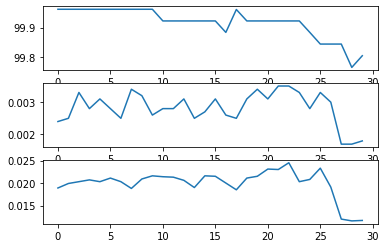

99.96153846153845


In [ ]:
knn_accuracy,knn_fit_time,knn_score_time = [],[],[]
for i in range(1,31):
  class_KNN = KNeighborsClassifier(n_neighbors=i)
  results_knn = cross_validate(estimator= class_KNN, X=X, y=Y, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})
  knn_accuracy.append(100*np.mean(results_knn['test_accuracy']))
  knn_fit_time.append(round(np.mean(results_knn['fit_time']),4))
  knn_score_time.append(round(np.mean(results_knn['score_time']),4))

'''
print('\n',
        '\nMean Training Time:', round(np.mean(results_knn['fit_time']),4),
        '\nMean Testing Time:', round(np.mean(results_knn['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_knn['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_knn['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_knn['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_knn['test_f1_score']),3))
'''

plt.figure()
plt.subplot(311)
plt.plot(knn_accuracy)
plt.subplot(312)
plt.plot(knn_fit_time)
plt.subplot(313)
plt.plot(knn_score_time)
plt.show()
print(max(knn_accuracy))

##MLP (our aim is to decrease the training time without comprosmising the results)

the training time seems to have a problem where the time is almost doubled in some test runs, will have to look into that (maybe they were halfed as initially training time is higher, maybe colab does something during initialization)

In [ ]:
kfold_1 = StratifiedKFold(n_splits=10)
kfold_2 = StratifiedKFold(n_splits=5)
kfold_3 = StratifiedKFold(n_splits=3)
kfold_4 = StratifiedKFold(n_splits=2)

In [ ]:
class_MLP_1 = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 5000)
class_MLP_2 = MLPClassifier(hidden_layer_sizes = (128,32), activation="relu", random_state=1, max_iter = 5000)
class_MLP_3 = MLPClassifier(hidden_layer_sizes = (64,32), activation="relu", random_state=1, max_iter = 5000)

###CASE 1: hidden layer- (128,64,32)

In [ ]:
results_mlp_11 = cross_validate(estimator= class_MLP_1, X=X, y=Y, cv=kfold_1, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 1 (original), 10 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_11['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_11['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_11['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_11['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_11['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_11['test_f1_score']),3))


MLP 1 (original), 10 splits, 
Mean Training Time: 6.089 
Mean Testing Time: 0.0094 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_12 = cross_validate(estimator= class_MLP_1, X=X, y=Y, cv=kfold_2, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 1 (original), 5 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_12['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_12['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_12['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_12['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_12['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_12['test_f1_score']),3))


MLP 1 (original), 5 splits, 
Mean Training Time: 3.099 
Mean Testing Time: 0.0075 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_13 = cross_validate(estimator= class_MLP_1, X=X, y=Y, cv=kfold_3, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 1 (original), 3 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_13['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_13['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_13['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_13['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_13['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_13['test_f1_score']),3))


MLP 1 (original), 3 splits, 
Mean Training Time: 4.587 
Mean Testing Time: 0.0136 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_14 = cross_validate(estimator= class_MLP_1, X=X, y=Y, cv=kfold_4, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 1 (original), 10 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_14['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_14['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_14['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_14['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_14['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_14['test_f1_score']),3))


MLP 1 (original), 10 splits, 
Mean Training Time: 6.484 
Mean Testing Time: 0.0239 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


Using less splits we confirmed that even with 50% of the data the current proposed model can perfectly predict the other half, less data helps the model in converging faster, though even that is not certain in neural networks, the converging time was varying vastly for different test runs

Thus we will now try reduced models to see their accuracy

###CASE 2: hidden layer- (128,32)

In [ ]:
results_mlp_21 = cross_validate(estimator= class_MLP_2, X=X, y=Y, cv=kfold_1, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 2 (reduced model 1), 10 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_21['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_21['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_21['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_21['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_21['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_21['test_f1_score']),3))


MLP 2 (reduced model 1), 10 splits, 
Mean Training Time: 3.86 
Mean Testing Time: 0.0063 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_22 = cross_validate(estimator= class_MLP_2, X=X, y=Y, cv=kfold_2, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 2 (reduced model 1), 5 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_22['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_22['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_22['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_22['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_22['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_22['test_f1_score']),3))


MLP 2 (reduced model 1), 5 splits, 
Mean Training Time: 8.738 
Mean Testing Time: 0.0148 
Mean Accuracy: 99.961 
Mean Precision: 99.961 
Mean Recall: 99.961 
Mean F1-score: 99.961


In [ ]:
results_mlp_23 = cross_validate(estimator= class_MLP_2, X=X, y=Y, cv=kfold_3, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 2 (reduced model 1), 3 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_23['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_23['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_23['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_23['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_23['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_23['test_f1_score']),3))


MLP 2 (reduced model 1), 3 splits, 
Mean Training Time: 7.596 
Mean Testing Time: 0.0135 
Mean Accuracy: 99.961 
Mean Precision: 99.961 
Mean Recall: 99.961 
Mean F1-score: 99.961


In [ ]:
results_mlp_24 = cross_validate(estimator= class_MLP_2, X=X, y=Y, cv=kfold_4, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 2 (reduced model 1), 2 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_24['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_24['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_24['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_24['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_24['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_24['test_f1_score']),3))


MLP 2 (reduced model 1), 2 splits, 
Mean Training Time: 6.979 
Mean Testing Time: 0.0165 
Mean Accuracy: 99.961 
Mean Precision: 99.961 
Mean Recall: 99.961 
Mean F1-score: 99.961


We notice here that the training time has increased significantly while the perfect result has dropped to KNN's level, thus it is not wise to reduce the size of the neural network while reducing the training data and iterations is still a possible solution for case 1

###CASE 3: hidden layer- (64,32)

In [ ]:
results_mlp_31 = cross_validate(estimator= class_MLP_3, X=X, y=Y, cv=kfold_1, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 3 (reduced model 2), 10 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_31['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_31['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_31['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_31['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_31['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_31['test_f1_score']),3))


MLP 3 (reduced model 2), 10 splits, 
Mean Training Time: 3.874 
Mean Testing Time: 0.0059 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_32 = cross_validate(estimator= class_MLP_3, X=X, y=Y, cv=kfold_2, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 3 (reduced model 2), 5 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_32['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_32['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_32['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_32['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_32['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_32['test_f1_score']),3))


MLP 3 (reduced model 2), 5 splits, 
Mean Training Time: 3.888 
Mean Testing Time: 0.0069 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_33 = cross_validate(estimator= class_MLP_3, X=X, y=Y, cv=kfold_3, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 3 (reduced model 2), 3 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_33['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_33['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_33['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_33['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_33['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_33['test_f1_score']),3))


MLP 3 (reduced model 2), 3 splits, 
Mean Training Time: 3.813 
Mean Testing Time: 0.0081 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_34 = cross_validate(estimator= class_MLP_3, X=X, y=Y, cv=kfold_4, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 3 (reduced model 2), 2 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_34['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_34['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_34['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_34['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_34['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_34['test_f1_score']),3))


MLP 3 (reduced model 2), 2 splits, 
Mean Training Time: 3.22 
Mean Testing Time: 0.0088 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


This reduced network gave similar results as the first proposed network but by using lesser neurons, thus we should observe both models when experimenting with datasets and iterations

###CASE 4: Using original model and second reduced model with smaller dataset and lesser iterations

In [ ]:
class_MLP_4 = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 2500)
class_MLP_5 = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 500)

In [ ]:
results_mlp_41 = cross_validate(estimator= class_MLP_4, X=X, y=Y, cv=kfold_1, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 4 (original with 2500 iterations), 10 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_41['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_41['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_41['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_41['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_41['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_41['test_f1_score']),3))


MLP 4 (original with 2500 iterations), 10 splits, 
Mean Training Time: 5.653 
Mean Testing Time: 0.0123 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_51 = cross_validate(estimator= class_MLP_5, X=X, y=Y, cv=kfold_1, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 5 (original with 500 iterations), 10 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_51['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_51['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_51['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_51['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_51['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_51['test_f1_score']),3))


MLP 5 (original with 500 iterations), 10 splits, 
Mean Training Time: 3.073 
Mean Testing Time: 0.0064 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_44 = cross_validate(estimator= class_MLP_4, X=X, y=Y, cv=kfold_4, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 4 (original with 2500 iterations), 2 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_44['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_44['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_44['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_44['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_44['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_44['test_f1_score']),3))


MLP 4 (original with 2500 iterations), 2 splits, 
Mean Training Time: 2.866 
Mean Testing Time: 0.0109 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_54 = cross_validate(estimator= class_MLP_5, X=X, y=Y, cv=kfold_4, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 5 (original with 500 iterations), 2 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_54['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_54['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_54['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_54['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_54['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_54['test_f1_score']),3))


MLP 5 (original with 500 iterations), 2 splits, 
Mean Training Time: 2.888 
Mean Testing Time: 0.0114 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


As such reducing the model depth and iterations/ training batch size do not help much in redcuing training or testing time

In [ ]:
class_MLP_6 = MLPClassifier(hidden_layer_sizes = (32,16), activation="relu", random_state=1, max_iter = 5000)

results_mlp_64 = cross_validate(estimator= class_MLP_6, X=X, y=Y, cv=kfold_4, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 6 (reduced model with 5000 iterations), 2 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_64['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_64['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_64['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_64['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_64['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_64['test_f1_score']),3))


MLP 6 (reduced model with 5000 iterations), 2 splits, 
Mean Training Time: 3.387 
Mean Testing Time: 0.008 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
class_MLP_7 = MLPClassifier(hidden_layer_sizes = (16,8), activation="relu", random_state=1, max_iter = 5000)

results_mlp_74 = cross_validate(estimator= class_MLP_7, X=X, y=Y, cv=kfold_4, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 7 (reduced model with 5000 iterations), 2 splits,',
        '\nMean Training Time:', round(np.mean(results_mlp_74['fit_time']),3),
        '\nMean Testing Time:', round(np.mean(results_mlp_74['score_time']),4),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_74['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_74['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_74['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_74['test_f1_score']),3))


MLP 7 (reduced model with 5000 iterations), 2 splits, 
Mean Training Time: 4.389 
Mean Testing Time: 0.0082 
Mean Accuracy: 99.961 
Mean Precision: 99.961 
Mean Recall: 99.961 
Mean F1-score: 99.961


##Using KNN for separating class 1, 2, 3 with 4 and 5. Using MLP for class 4 and 5

###MLP part

In [ ]:
class_MLP_1 = MLPClassifier(hidden_layer_sizes = (128,64,32), activation="relu", random_state=1, max_iter = 5000)
class_MLP_2 = MLPClassifier(hidden_layer_sizes = (32,16), activation="relu", random_state=1, max_iter = 5000)
kfold_m = StratifiedKFold(n_splits=10)
kfold_n = StratifiedKFold(n_splits=2)

Y_MLP = Y[Y>3]
X_MLP = X[Y>3,:]
print(Y_MLP)
print(Y_MLP.shape)
print(X_MLP.shape)

[4. 4. 4. ... 5. 5. 5.]
(1024,)
(1024, 68)


In [ ]:
results_mlp_11 = cross_validate(estimator= class_MLP_1, X=X_MLP, y=Y_MLP, cv=kfold_m, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 1 (original), 10 splits,',
        '\nMean Training Time:', np.mean(results_mlp_11['fit_time']),
        '\nMean Testing Time:', np.mean(results_mlp_11['score_time']),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_11['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_11['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_11['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_11['test_f1_score']),3))


MLP 1 (original), 10 splits, 
Mean Training Time: 1.3701672554016113 
Mean Testing Time: 0.00527796745300293 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_12 = cross_validate(estimator= class_MLP_1, X=X_MLP, y=Y_MLP, cv=kfold_n, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 1 (original), 2 splits,',
        '\nMean Training Time:', np.mean(results_mlp_12['fit_time']),
        '\nMean Testing Time:', np.mean(results_mlp_12['score_time']),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_12['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_12['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_12['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_12['test_f1_score']),3))


MLP 1 (original), 2 splits, 
Mean Training Time: 1.040995717048645 
Mean Testing Time: 0.006955504417419434 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_21 = cross_validate(estimator= class_MLP_2, X=X_MLP, y=Y_MLP, cv=kfold_m, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 2 (reduced)), 10 splits,',
        '\nMean Training Time:', np.mean(results_mlp_21['fit_time']),
        '\nMean Testing Time:', np.mean(results_mlp_21['score_time']),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_21['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_21['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_21['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_21['test_f1_score']),3))


MLP 2 (reduced)), 10 splits, 
Mean Training Time: 1.6310516834259032 
Mean Testing Time: 0.0051736593246459964 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


In [ ]:
results_mlp_22 = cross_validate(estimator= class_MLP_2, X=X_MLP, y=Y_MLP, cv=kfold_n, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nMLP 2 (reduced)), 2 splits,',
        '\nMean Training Time:', np.mean(results_mlp_22['fit_time']),
        '\nMean Testing Time:', np.mean(results_mlp_22['score_time']),
        '\nMean Accuracy:',round(100*np.mean(results_mlp_22['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_mlp_22['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_mlp_22['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_mlp_22['test_f1_score']),3))


MLP 2 (reduced)), 2 splits, 
Mean Training Time: 1.4190704822540283 
Mean Testing Time: 0.007067203521728516 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


Increasing splits increases train data size and increases training time, but it decreases mean testing time as well because of less test cases per split

somehow smaller networks take longer to train, i don't know why

###KNN part

In [ ]:
class_KNN = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10)


Y_KNN = np.where(Y==5,4,Y)
X_KNN = X

print(Y.shape)
print(Y_KNN)
print(Y_KNN.shape)
print(X_KNN.shape)

(2569,)
[1. 1. 1. ... 4. 4. 4.]
(2569,)
(2569, 68)


In [ ]:
results_knn_1 = cross_validate(estimator= class_KNN, X=X_KNN, y=Y_KNN, cv=kfold, scoring={'accuracy' : make_scorer(accuracy_score),
                                                                            'precision' : make_scorer(precision_score,average = 'weighted'),
                                                                            'recall' : make_scorer(recall_score,average = 'weighted'),
                                                                            'f1_score' : make_scorer(f1_score,average = 'weighted')})

print('\nKNN, 10 splits,',
        '\nMean Training Time:', np.mean(results_knn_1['fit_time']),
        '\nMean Testing Time:', np.mean(results_knn_1['score_time']),
        '\nMean Accuracy:',round(100*np.mean(results_knn_1['test_accuracy']),3),
        '\nMean Precision:',round(100*np.mean(results_knn_1['test_precision']),3),
        '\nMean Recall:',round(100*np.mean(results_knn_1['test_recall']),3),
        '\nMean F1-score:',round(100*np.mean(results_knn_1['test_f1_score']),3))


KNN, 10 splits, 
Mean Training Time: 0.0019175052642822266 
Mean Testing Time: 0.044211077690124514 
Mean Accuracy: 100.0 
Mean Precision: 100.0 
Mean Recall: 100.0 
Mean F1-score: 100.0


KNN has very small training time, while the testing time is greater than MLP's testing time

Thus, depending on need, if we require an online system with new training cases, knn would be preferred, but in case of a defined dataset, MLP would be better. We can use the above mixed method if we needed the best of both worlds.